In [4]:
import  pandas  as  pd

df  =  pd.read_csv('../Data/dpe.csv' )
# df  =  pd.read_csv('../Data/dpe-v2-logements-existants.csv')

df.head()

C:\Users\ediad\AppData\Local\Temp\ipykernel_28844\544281107.py:3: DtypeWarning: Columns (7,9,10,11,22,23,25,36,40,44,54,60,61,65,75,80,83,87,90,93,94,100,104,107,119,123,124,130,131,139,141,142,145,149,155,156,177,178,183,192,193,195) have mixed types. Specify dtype option on import or set low_memory=False.
  df  =  pd.read_csv('../Data/dpe.csv' )


,Conso_5_usages_é_finale_énergie_n°1,Coût_ECS_énergie_n°1,Nombre_niveau_logement,Conso_refroidissement_dépensier_é_primaire,Qualité_isolation_menuiseries,Version_DPE,Complément_d'adresse_logement,Type_énergie_générateur_n°1_installation_n°1,Conso_ECS_dépensier_é_finale,Description_installation_ECS,...,Coût_chauffage_énergie_n°1,Type_énergie_n°1,Déperditions_murs,Type_énergie_générateur_n°2_installation_n°1,Description_installation_chauffage_n°1,Année_construction,Position_logement_dans_immeuble,Anne_réception_DPE,Coût chauffage en %,Periode_construction
0,6334.7,325.6,1.0,0.0,moyenne,2.2,NaN,Électricité,2471.7,Ballon électrique à accumulation vertical (cat...,...,694.2,Électricité,20.1,NaN,Radiateur électrique à inertie (modélisé comme...,2001.0,NaN,2023,63.647199,"2000-2010,"
1,3761.8,226.5,1.0,0.0,moyenne,2.4,Etage : 5éme,Gaz naturel,2178.7,Combiné au système de chauffage,...,267.1,Gaz naturel,6.7,NaN,Chaudière individuelle gaz basse température i...,NaN,NaN,2024,41.507382,NaN
2,37283.6,248.6,1.0,0.0,insuffisante,2.3,NaN,Gaz naturel,4146.1,Combiné au système de chauffage,...,2417.1,Gaz naturel,91.9,NaN,Chaudière individuelle gaz classique installée...,NaN,NaN,2024,86.977330,NaN
3,3933.8,283.4,3.0,0.0,bonne,2.1,Etage : 3ème ;,Électricité,1929.5,"Ballon électrique à accumulation horizontal, c...",...,426.1,Électricité,15.8,NaN,"Convecteur électrique NFC, NF** et NF*** avec ...",NaN,NaN,2022,59.271109,NaN
4,3548.9,252.0,3.0,0.0,moyenne,2.1,Etage : 2ème ;,Électricité,1731.6,Ballon électrique à accumulation vertical (cat...,...,399.0,Électricité,19.8,NaN,"Panneau rayonnant électrique NFC, NF** et NF**...",NaN,NaN,2022,60.408781,NaN


In [118]:
df['Etiquette_DPE'].value_counts(normalize=True)

Etiquette_DPE
C    0.395825
D    0.287051
E    0.178647
F    0.052748
B    0.051427
G    0.029123
A    0.005180
Name: proportion, dtype: float64

In [119]:
df['passoire_energetique'] = df['Etiquette_DPE'].isin(['F', 'G'])
df['passoire_energetique'].value_counts(normalize=True)

passoire_energetique
False    0.918129
True     0.081871
Name: proportion, dtype: float64

In [120]:
# Vérification des données manquantes
ls_variables_explicatives = ['Année_construction','Surface_habitable_logement','Coût_total_5_usages','Coût_chauffage','Coût_éclairage','Coût_auxiliaires','Coût_refroidissement','Type_énergie_n°1']

In [121]:
df['Type_énergie_n°1']

0        Électricité
1        Gaz naturel
2        Gaz naturel
3        Électricité
4        Électricité
            ...     
18915    Électricité
18916    Électricité
18917    Électricité
18918    Électricité
18919    Électricité
Name: Type_énergie_n°1, Length: 18920, dtype: object

In [122]:
df[ls_variables_explicatives].isnull().sum()
for var in ls_variables_explicatives:
    print(var)
    print(df[var].isnull().sum())
    

Année_construction
5324
Surface_habitable_logement
169
Coût_total_5_usages
0
Coût_chauffage
0
Coût_éclairage
0
Coût_auxiliaires
0
Coût_refroidissement
0
Type_énergie_n°1
0


In [123]:
# Vérification des données manquantes
df[ls_variables_explicatives].isnull().sum()
#Remplacer les valeurs NA par la moyenne des colonnes
for col in ls_variables_explicatives:
    try:
        df[col] = df[col].fillna(df[col].mean())
    except:
        print(f"Erreur sur la colonne {col}")

Erreur sur la colonne Type_énergie_n°1


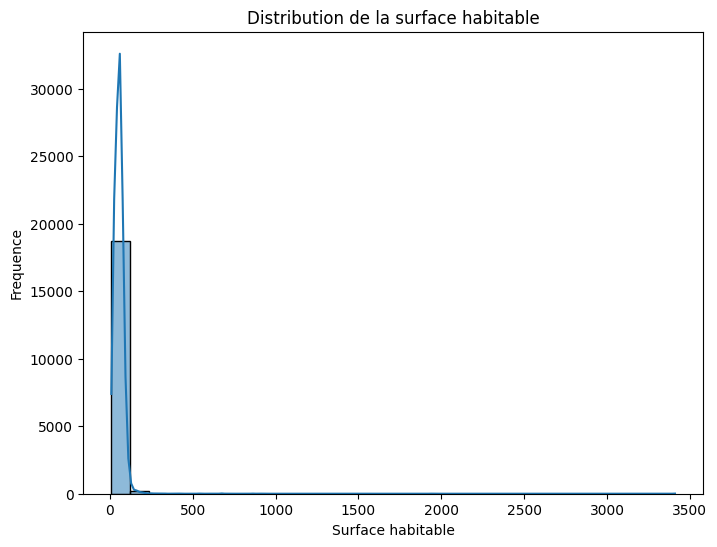

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))

sns.histplot(df['Surface_habitable_logement'], bins=30, kde=True)
plt.title('Distribution de la surface habitable')
plt.xlabel('Surface habitable')
plt.ylabel('Frequence')
plt.show()


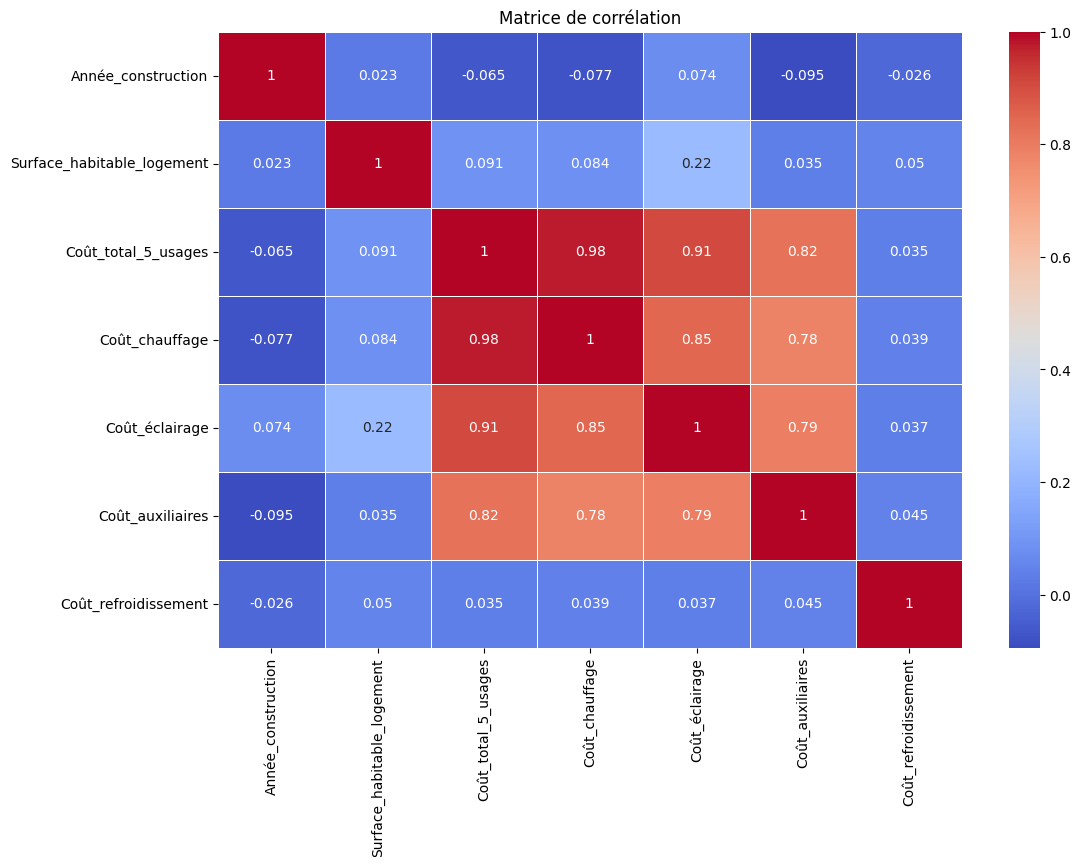

In [125]:
l =  ls_variables_explicatives[:-1]
corr_matrix = df[l].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

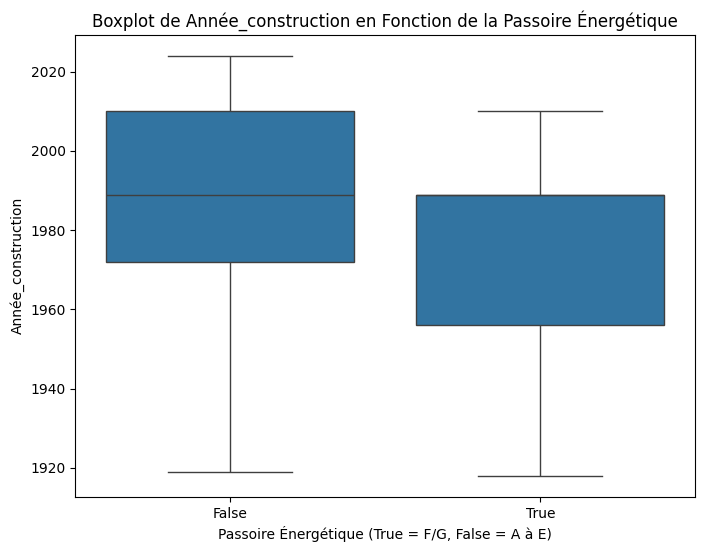

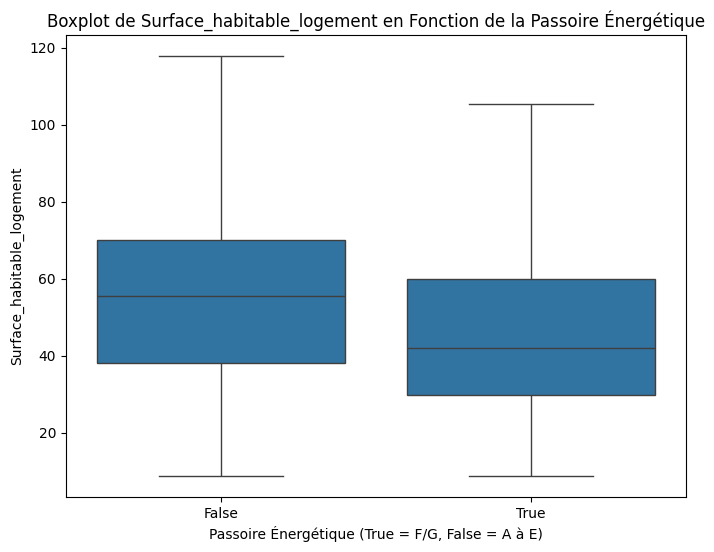

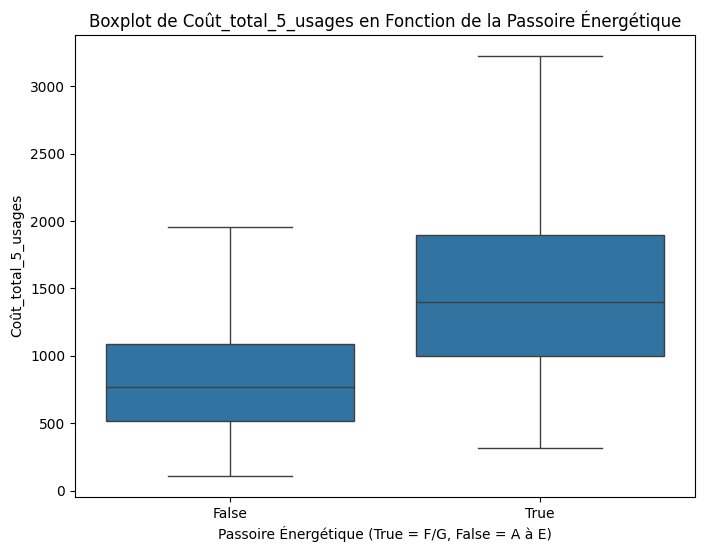

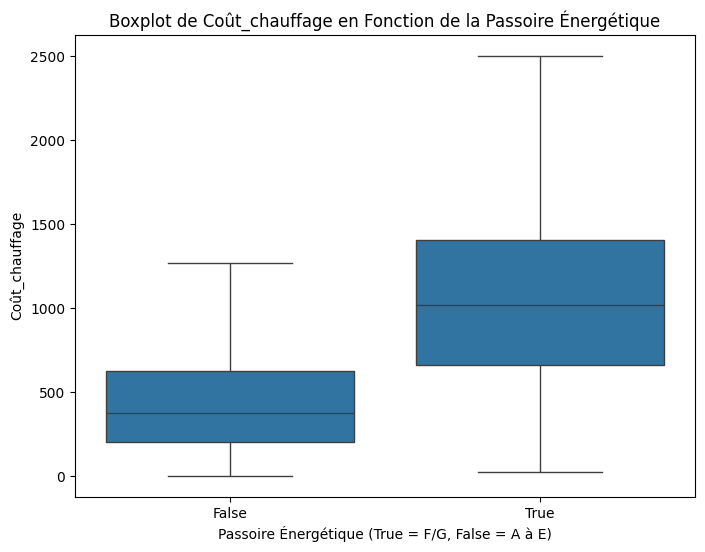

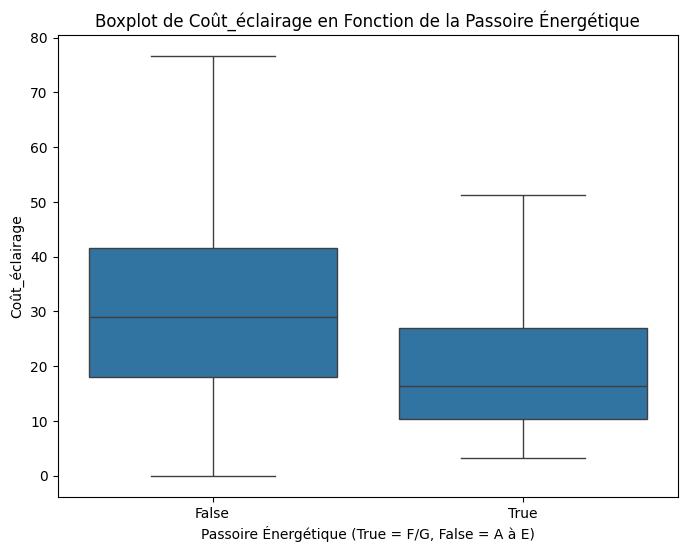

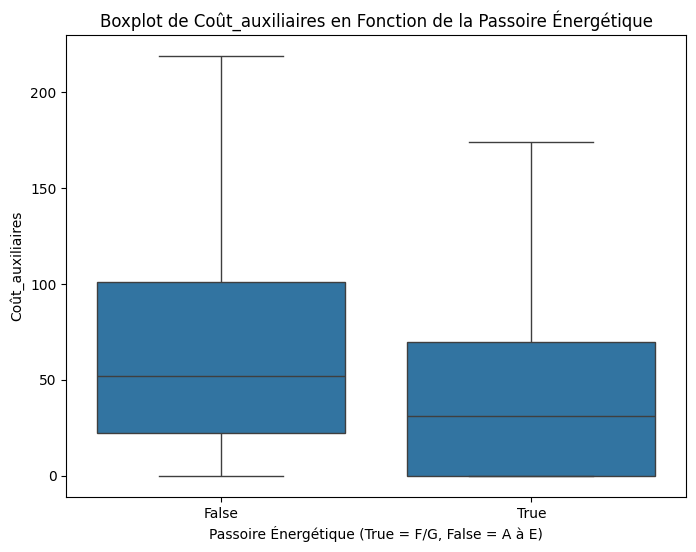

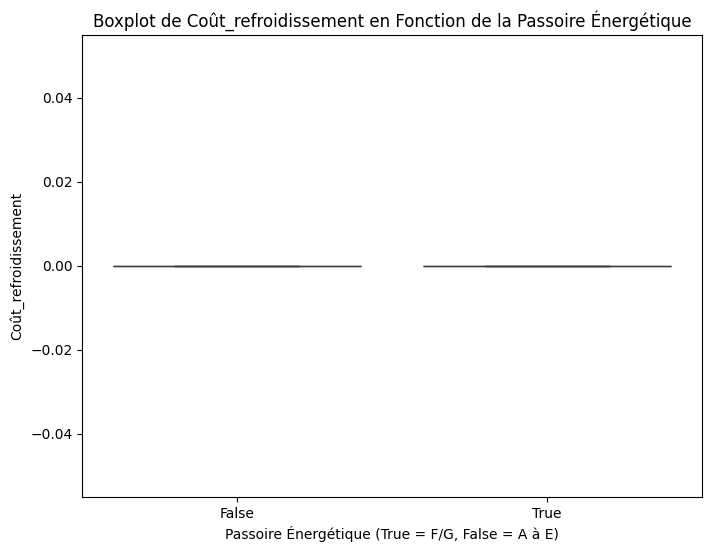

In [126]:
# Boxplot de chaque variable explicative par rapport à la passoire énergétique
for col in ls_variables_explicatives[:-1]:
    plt.figure(figsize=(8, 6))
    
    # Tracer le boxplot sans les outliers
    sns.boxplot(x='passoire_energetique', y=col, data=df, showfliers=False)
    
    # Automatiser le titre avec le nom de la colonne
    plt.title(f'Boxplot de {col} en Fonction de la Passoire Énergétique')
    
    plt.xlabel('Passoire Énergétique (True = F/G, False = A à E)')
    plt.ylabel(f'{col}')  # Automatiser l'étiquette de l'axe y avec le nom de la colonne
    plt.show()


In [127]:
# Concaténer les deux listes : ls_variables_explicatives et ['passoire_energetique']
df = df[ls_variables_explicatives + ['passoire_energetique']]
df = pd.get_dummies(df, columns=['Type_énergie_n°1'], drop_first=True)

In [128]:
# Utiliser set.difference() pour exclure la colonne cible de ls_variables_explicatives
X =df[df.columns.difference(['passoire_energetique'])]

In [129]:
Y = df['passoire_energetique']

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    stratify = Y,
                                                    random_state = 42)

In [131]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

passoire_energetique
False    0.918076
True     0.081924
Name: proportion, dtype: float64

In [132]:
print(X_train.shape)
print(X_test.shape)
X_test.head()

(13244, 14)
(5676, 14)


,Année_construction,Coût_auxiliaires,Coût_chauffage,Coût_refroidissement,Coût_total_5_usages,Coût_éclairage,Surface_habitable_logement,Type_énergie_n°1_Bois – Granulés (pellets) ou briquettes,Type_énergie_n°1_Bois – Plaquettes forestières,Type_énergie_n°1_Fioul domestique,Type_énergie_n°1_GPL,Type_énergie_n°1_Gaz naturel,Type_énergie_n°1_Réseau de Chauffage urbain,Type_énergie_n°1_Électricité
17092,2024.0,5.5,120.3,0.0,359.0,83.1,42.1,False,False,False,False,False,True,False
4779,1994.0,0.0,131.6,0.0,437.9,40.9,22.0,False,False,False,False,False,False,True
7359,2008.0,61.2,386.9,83.4,937.3,22.8,70.0,False,False,False,False,False,False,True
13406,1972.0,38.2,489.5,0.0,958.8,25.6,64.0,False,False,False,False,False,True,False
10052,1971.0,56.3,1446.1,0.0,1694.9,37.9,70.3,False,False,False,False,True,False,False


In [133]:
from sklearn.tree import DecisionTreeClassifier
model_arbre = DecisionTreeClassifier(max_depth=3 , min_samples_leaf=50, min_samples_split=100)
model_arbre = model_arbre.fit(X_train,y_train)

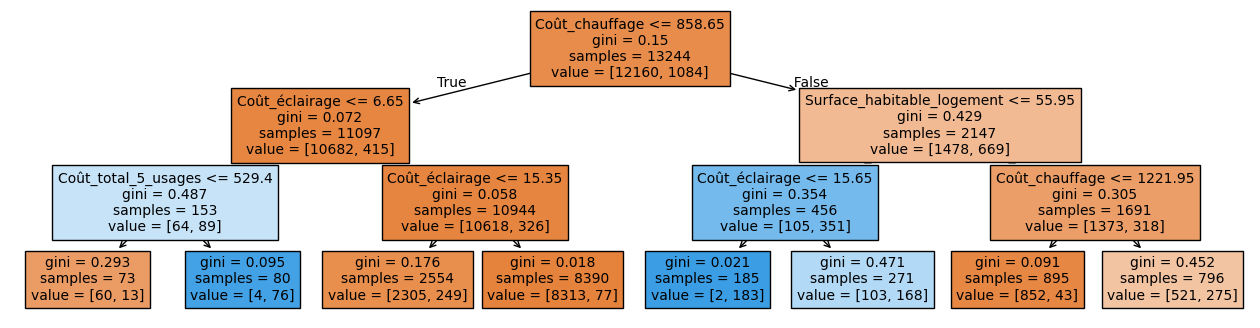

In [134]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,4))
plot_tree(model_arbre,feature_names = list(X.columns),filled=True, fontsize=10)
plt.show()

In [135]:
y_pred = model_arbre.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [136]:
y_pred_proba = model_arbre.predict_proba(X_test)
y_pred_proba[0:10]

array([[0.99082241, 0.00917759],
       [0.99082241, 0.00917759],
       [0.99082241, 0.00917759],
       [0.99082241, 0.00917759],
       [0.65452261, 0.34547739],
       [0.90250587, 0.09749413],
       [0.99082241, 0.00917759],
       [0.99082241, 0.00917759],
       [0.99082241, 0.00917759],
       [0.99082241, 0.00917759]])

In [137]:
from sklearn.metrics import confusion_matrix
mc = pd.DataFrame(confusion_matrix(y_test,y_pred),
                  columns=['pred_0','pred_1'],
                  index=['obs_0','obs_1'])

mc

#ou 

pd.crosstab(y_test,y_pred, colnames=['pred'], rownames=['obs'], margins=True)

pred,False,True,All
obs,,,
False,5170,41,5211
True,296,169,465
All,5466,210,5676


In [138]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9406272022551092


In [139]:
from sklearn.metrics import recall_score, precision_score
print('recall :' + str(recall_score(y_test,y_pred,average='binary', pos_label=0)))
print('precision : ' + str(precision_score(y_test,y_pred, average='binary', pos_label=0)))

recall :0.9921320284014584
precision : 0.9458470545188438


In [140]:
from sklearn.metrics import f1_score
print('f1_score : ' + str(f1_score(y_test,y_pred, average='binary', pos_label=0)))

f1_score : 0.9684368268240142


In [141]:
print('recall : ' + str(recall_score(y_test,y_pred,average='macro')))
print('precision : ' + str(precision_score(y_test,y_pred, average='macro')))
print('f1_score : ' + str(f1_score(y_test,y_pred, average='macro')))

recall : 0.6777864443082561
precision : 0.8753044796403743
f1_score : 0.7345887837823775


In [142]:
print('recall : ' + str(recall_score(y_test,y_pred,average='weighted')))
print('precision : ' + str(precision_score(y_test,y_pred, average='weighted')))
print('f1_score : ' + str(f1_score(y_test,y_pred, average='weighted')))

recall : 0.9406272022551092
precision : 0.9342888102205744
f1_score : 0.9301213440846341


In [143]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report

# Création d'un modèle d'arbre de décision
model_arbre_cv = DecisionTreeClassifier(random_state=42)

# Mise en œuvre de la validation croisée
# Ici, nous utilisons une validation croisée à 5 plis
cv_scores = cross_val_score(model_arbre_cv, X_train, y_train, cv=5, scoring='f1_macro')

# Affichage des scores de validation croisée
print(f"Scores de validation croisée : {cv_scores}")
print(f"Moyenne des scores de validation croisée : {cv_scores.mean()}")

# Entraînement du modèle sur l'ensemble d'entraînement
model_arbre_cv.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_arbre_cv = model_arbre_cv.predict(X_test)

# Évaluation du modèle
print(classification_report(y_test, y_pred_arbre_cv))
print(f"Accuracy sur l'ensemble de test : {accuracy_score(y_test, y_pred_arbre_cv)}")

Scores de validation croisée : [0.88892316 0.89197726 0.89901392 0.9046299  0.88956774]
Moyenne des scores de validation croisée : 0.8948223941287946
              precision    recall  f1-score   support

       False       0.98      0.98      0.98      5211
        True       0.82      0.82      0.82       465

    accuracy                           0.97      5676
   macro avg       0.90      0.90      0.90      5676
weighted avg       0.97      0.97      0.97      5676

Accuracy sur l'ensemble de test : 0.9705778717406625


In [144]:
import numpy as np
#cette fois-ci on utilise numpy pour générer des séquences à la place des listes
parameters = {'max_depth' : np.arange(start = 1, stop = 10, step = 1) ,
              'min_samples_leaf' : np.arange(start = 5, stop = 250, step = 50),
              'min_samples_split' : np.arange(start = 10, stop = 500, step = 50)}

In [145]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
model_arbre_grid = DecisionTreeClassifier()
score = make_scorer(f1_score, pos_label=0)
model_arbre_grid = GridSearchCV(model_arbre_grid, parameters, scoring = score, verbose = 2, cv = 5)
model_arbre_grid.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=110; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=110; total time=   0.0s
[

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([  5,  55, 105, 155, 205]),
                         'min_samples_split': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=0),
             verbose=2)

In [146]:
print("Voici les paramètres du meilleure modèle : " + str(model_arbre_grid.best_estimator_))
print("Voici le "  + str(model_arbre_grid.scorer_) + " du meilleure modèle : " + str(model_arbre_grid.best_score_))

Voici les paramètres du meilleure modèle : DecisionTreeClassifier(max_depth=np.int64(8), min_samples_leaf=np.int64(5),
                       min_samples_split=np.int64(10))
Voici le make_scorer(f1_score, response_method='predict', pos_label=0) du meilleure modèle : 0.9829177274992741


In [147]:
# Prédictions sur l'ensemble de test
y_pred_arbre_grid = model_arbre_grid.predict(X_test)

In [148]:
# Évaluation du modèle
print(classification_report(y_test, y_pred_arbre_grid))
print(f"Accuracy sur l'ensemble de test : {accuracy_score(y_test, y_pred_arbre_grid)}")
print('recall :' + str(recall_score(y_test,y_pred,average='binary', pos_label=0)))
print('precision : ' + str(precision_score(y_test,y_pred, average='binary', pos_label=0)))
print('f1_score : ' + str(f1_score(y_test,y_pred, average='binary', pos_label=0)))

              precision    recall  f1-score   support

       False       0.98      0.99      0.98      5211
        True       0.85      0.73      0.79       465

    accuracy                           0.97      5676
   macro avg       0.91      0.86      0.88      5676
weighted avg       0.97      0.97      0.97      5676

Accuracy sur l'ensemble de test : 0.9675828047921071
recall :0.9921320284014584
precision : 0.9458470545188438
f1_score : 0.9684368268240142


In [149]:
y_pred_proba_cv = model_arbre_cv.predict_proba(X_test)
y_pred_proba_grid = model_arbre_grid.predict_proba(X_test)

In [150]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba_cv[:,1])
roc_auc1 = roc_auc_score(y_test, y_pred_proba_cv[:,1])

fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba_grid[:,1])
roc_auc2 = roc_auc_score(y_test, y_pred_proba_grid[:,1])

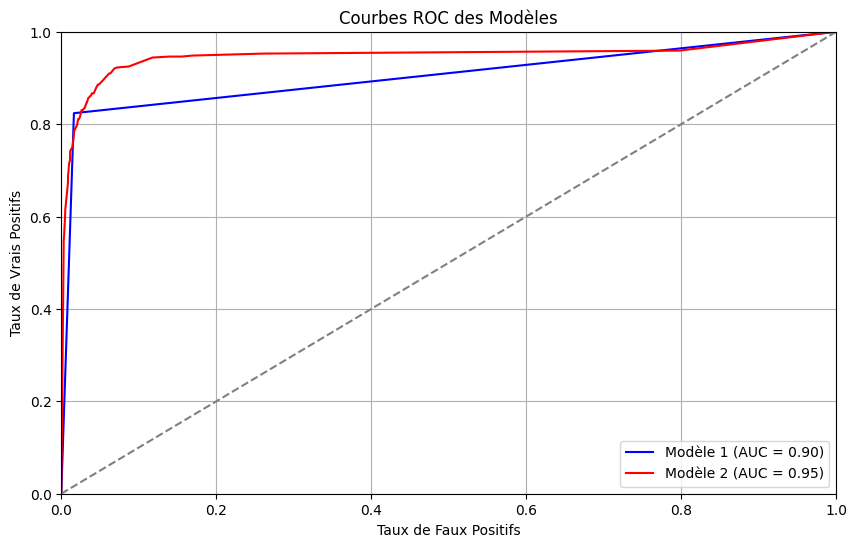

In [151]:
import matplotlib.pyplot as plt
# Tracé des courbes ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, color='blue', label=f'Modèle 1 (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='red', label=f'Modèle 2 (AUC = {roc_auc2:.2f})')

# Tracé de la ligne de chance
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

# Détails du graphique
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbes ROC des Modèles')
plt.legend(loc='lower right')
plt.grid()

# Affichage du graphique
plt.show()

In [152]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
print('f1_score : ' + str(f1_score(y_test,y_pred_knn,average='binary', pos_label=1)))

f1_score : 0.665903890160183


In [153]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression()
reg_log_model = reg_log.fit(X_train, y_train)
y_pred_reg = reg_log_model.predict(X_test)

print('f1_score : ' + str(f1_score(y_test,y_pred_reg,average='binary', pos_label=1)))

f1_score : 0.49445324881141045


c:\Users\ediad\Documents\ProgPython\pythonMl\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [154]:
reg_log_model.predict_proba(X_test)[0:10]

array([[9.99968593e-01, 3.14071024e-05],
       [9.96613289e-01, 3.38671060e-03],
       [9.87736103e-01, 1.22638974e-02],
       [9.76286790e-01, 2.37132097e-02],
       [7.93630262e-01, 2.06369738e-01],
       [8.36331936e-01, 1.63668064e-01],
       [9.71035254e-01, 2.89647459e-02],
       [9.58239184e-01, 4.17608157e-02],
       [9.95875868e-01, 4.12413213e-03],
       [9.77987783e-01, 2.20122169e-02]])

In [155]:
coef = pd.DataFrame(reg_log_model.coef_[0,] ,index = X_train.columns, columns=['Coef'])
coef.loc['Constante'] = reg_log_model.intercept_
coef

,Coef
Année_construction,-0.000514
Coût_auxiliaires,0.001240
Coût_chauffage,0.005137
Coût_refroidissement,-0.004649
Coût_total_5_usages,-0.001606
Coût_éclairage,-0.104504
Surface_habitable_logement,-0.016374
Type_énergie_n°1_Bois – Granulés (pellets) ou briquettes,0.000050
Type_énergie_n°1_Bois – Plaquettes forestières,0.000000
Type_énergie_n°1_Fioul domestique,0.000904


In [160]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)
rf_model = rf_clf.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print('f1_score : ' + str(f1_score(y_test,y_pred_rf,average='binary', pos_label=1)))

pd.crosstab(y_test,y_pred, colnames=['pred'], rownames=['obs'], margins=True)

f1_score : 0.839677047289504


pred,False,True,All
obs,,,
False,5170,41,5211
True,296,169,465
All,5466,210,5676


In [157]:
pd.DataFrame(rf_model.feature_importances_,
             index=X_train.columns.tolist(),
             columns=['Importances']).sort_values(by = 'Importances', ascending=False)

,Importances
Coût_chauffage,0.262201
Coût_éclairage,0.198386
Coût_total_5_usages,0.171935
Surface_habitable_logement,0.171553
Coût_auxiliaires,0.093209
Année_construction,0.060349
Type_énergie_n°1_Électricité,0.015601
Type_énergie_n°1_Gaz naturel,0.008257
Type_énergie_n°1_Réseau de Chauffage urbain,0.008190
Coût_refroidissement,0.005635


In [158]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [159]:
from imblearn.over_sampling import BorderlineSMOTE

oversample = BorderlineSMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)